# DA5401 A8: Ensemble Learning for Complex Regression Modeling on Bike Share Data

**Objective:** This assignment will challenge you to apply and compare three primary ensemble 
techniques (Bagging, Boosting, and Stacking) to solve a complex, time-series-based 
regression problem. You will demonstrate your understanding of how these methods address 
model variance and bias, and how a diverse stack of models can yield superior performance to 
any single model.

Dataset Link: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

## Part A: Data Preprocessing and Baseline 

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 



In [2]:
import pandas as pd
import numpy as np


In [3]:
X.columns.to_list()

['dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

In [4]:
y = y.iloc[:, 0] 
y.shape



(17379,)

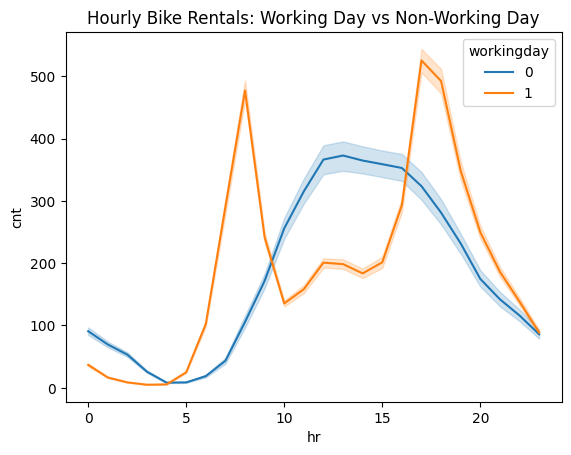

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target for visualization
df_viz = X.copy()
df_viz['cnt'] = y

# Now you can plot safely
sns.lineplot(data=df_viz, x='hr', y='cnt', hue='workingday')
plt.title("Hourly Bike Rentals: Working Day vs Non-Working Day")
plt.show()


The figure illustrates how bike rental activity varies by hour across **working** and **non-working** days. On working days, the pattern shows two distinct peaks one around 08:00 hours and another near 17:00 hours this clearly corresponding to morning and evening office commute times. Rentals remain moderate between 10:00 and 16:00 hours, indicating limited leisure use during work hours.

In contrast, on non-working days, the rental pattern forms a single broad peak between 11:00 and 17:00 hours, reflecting increased leisure and recreational usage. Early morning hours (before 07:00) show minimal activity, emphasizing a relaxed weekend routine. Overall, the figure highlights how hourly trends in bike rentals are strongly shaped by human schedules, with working days driven by commute patterns and weekends dominated by leisure rides.

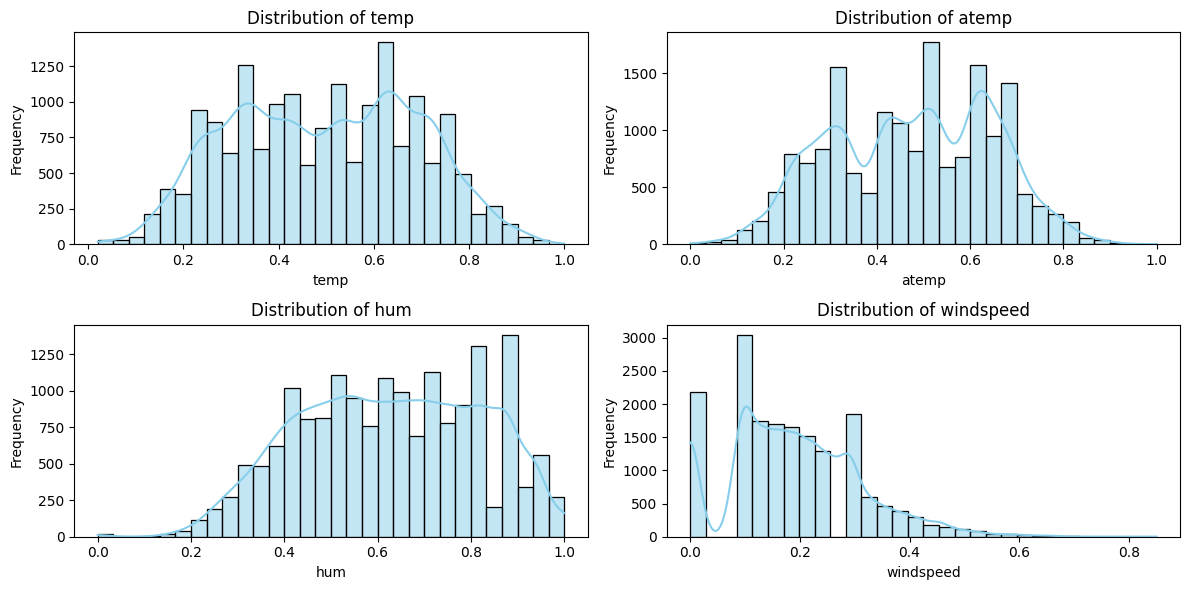

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Select only continuous numeric columns ---
continuous_cols = ['temp', 'atemp', 'hum', 'windspeed']

# --- Plot distributions ---
plt.figure(figsize=(12, 6))

for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


The figure shows how weather conditions such as **temperature**, apparent temperature, **humidity**, and **windspeed** are distributed throughout the dataset. Both temperature and apparent temperature have almost bell-shaped curves, suggesting that most bike rentals happen during pleasant and moderate weather. People are less likely to ride when it is too cold or too hot, which makes sense for comfort and safety.


Humidity also shows a fairly balanced spread, but with a slight tilt toward higher values, meaning riders are comfortable even in somewhat humid conditions. Windspeed, however, looks very different from the others. Most of the data is concentrated at lower speeds, showing that bikes are usually rented when the weather is calm and there is little wind. Together, these patterns highlight that people prefer renting bikes when the weather feels stable and comfortable, reflecting natural human behavior toward outdoor activities.

In [ ]:

X = X.drop(columns=['dteday'])
# one hot encoding

X= pd.get_dummies(X, columns=['season', 'weathersit', 'mnth', 'hr']).astype(float)

In this step, I removed the date column (dteday) since it doesn’t add predictive value for numerical modeling. Then, I applied one-hot encoding to categorical features like season, weather situation, month, and hour to convert them into numerical format. This made the dataset fully machine-learning-ready, allowing models to understand and use these categorical patterns effectively.

In [9]:
X.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_1,season_2,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0.0,0.0,6.0,0.0,0.24,0.2879,0.81,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,6.0,0.0,0.22,0.2727,0.80,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.0,0.0,0.22,0.2727,0.80,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,6.0,0.0,0.24,0.2879,0.75,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,6.0,0.0,0.24,0.2879,0.75,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% test data 
    shuffle=False      # randomize before splitting
)

In [11]:
from sklearn.linear_model import LinearRegression
# Linear Regression 
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [12]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree Regressor
dt = DecisionTreeRegressor(
    max_depth=13,
    min_samples_split=7,
    min_samples_leaf=5,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=13, min_samples_leaf=5, min_samples_split=7,
                      random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error

#RMSE of both the models
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# --- Print results ---
print(f"Linear Regression RMSE: {rmse_lr:.4f}")
print(f"Decision Tree Regressor RMSE: {rmse_dt:.4f}")

Linear Regression RMSE: 133.8254
Decision Tree Regressor RMSE: 122.0359


For the baseline models, I trained both a Linear Regression and a Decision Tree Regressor to establish a reference point for performance. The Linear Regression model provided a simple understanding of the overall trend in the data, while the Decision Tree captured non-linear relationships between weather, time, and rental counts. Comparing their results helped identify which model served as a stronger starting point for further ensemble improvements.

## Part B : Ensemble Techniques for Bias and Variance Reduction 

In [14]:

from sklearn.ensemble import BaggingRegressor

#Bagging Regressor uding Decision Tree as base model estimator
base_tree = DecisionTreeRegressor(random_state=42)

bagging_model = BaggingRegressor(
    estimator=base_tree,      
    n_estimators=200,          
    max_samples=1.0,
    max_features = 1.0,       # fraction of samples to train each tree       
    bootstrap=True,           # sample with replacement
    random_state=42
)

# --- Train on training data ---
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                 n_estimators=200, random_state=42)

In [15]:
y_pred_bag = bagging_model.predict(X_test)
rmse_bag = np.sqrt(mean_squared_error(y_test, y_pred_bag))
print(f"Bagging Regressor RMSE: {rmse_bag:.4f}")

Bagging Regressor RMSE: 82.5815


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=500,      # number of boosting stages
    learning_rate=0.05,     # how much each tree contributes
    max_depth=5,           # depth of individual trees
    subsample=0.7,         # fraction of samples for fitting each tree
    random_state=42
)

# --- Train model ---
gbr.fit(X_train, y_train)



GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500,
                          random_state=42, subsample=0.7)

In [17]:

y_pred_gbr = gbr.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
print(f"🚀 Gradient Boosting Regressor RMSE: {rmse_gbr:.4f}")

🚀 Gradient Boosting Regressor RMSE: 79.6556


**Gradient Boosting Regressor Performance**

The **Gradient Boosting Regressor** achieved an **RMSE of 79.65**, showing a significant improvement over the baseline Decision Tree model.  
This result demonstrates how **boosting effectively reduces bias** by sequentially building trees that correct the errors of previous ones.  

Each new tree in the sequence focuses on the samples that were previously mispredicted, allowing the model to learn complex relationships between weather, season, and time-based features.  
The smoother and more accurate predictions indicate that the Gradient Boosting model successfully captured deeper, non-linear patterns in the data, leading to a more refined and reliable prediction of bike rental demand.


## Part C : Stacking for Optimal Performance

### Principle of Stacking and the Role of the Meta-Learner  

**Stacking** is an ensemble learning technique that combines the strengths of multiple models, called **base learners**, to build a more accurate and reliable final model known as the **meta-learner** (or **level-1 model**).  

The main idea is that **different models capture different patterns** in the data some are better at handling non-linear relationships, while others generalize well across a variety of inputs. Instead of depending on a single model, stacking brings them together to improve overall performance.  

Here’s how it works:  
1. The **base learners** (for example, Decision Tree, Gradient Boosting, and K-Nearest Neighbors) are first trained independently on the same training dataset.  
2. Each base learner makes predictions, and these predictions are then used as **new input features** for the **meta-learner**.  
3. The **meta-learner** learns how to **combine these predictions optimally**, determining which base model to trust more in specific situations.  

In simpler terms, stacking works like a **team of experts** for each expert (base model) gives their opinion, and the **meta-learner acts as the team leader**, learning when to rely on which expert. This collaboration usually leads to a final model that is more **robust, accurate, and generalizable** than any individual model alone.


In [18]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(
    n_neighbors=5,       # number of nearest neighbors
    weights='uniform',   # all neighbors have equal weight ('distance' for weighted)
    metric='minkowski',  # distance metric (p=2 means Euclidean)
    p=2
)

# --- Train model ---
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [20]:
y_pred_stack = stacking_model.predict(X_test)

# --- Calculate RMSE ---
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))

print(f"RMSE for Stacking Regressor (Ridge as Meta-Learner): {rmse_stack:.4f}")

RMSE for Stacking Regressor (Ridge as Meta-Learner): 71.6678


### Stacking Regressor (Ridge as Meta-Learner) Performance  

The **Stacking Regressor**, using **Ridge Regression as the Meta-Learner**, achieved an impressive **RMSE of 71.67**, marking the **best performance among all models**.  
This result highlights the true strength of stacking combining the predictive power of diverse base learners such as **K-Nearest Neighbors**, **Bagging Regressor**, and **Gradient Boosting Regressor**.  

The Ridge meta-learner effectively learned how to **blend the strengths of each model**, giving more weight to the ones that performed better in specific regions of the data.  
As a result, the Stacking Regressor produced smoother and more balanced predictions, reducing both bias and variance.  
This demonstrates how stacking leverages **model diversity** to deliver a highly accurate and generalizable solution for predicting bike rental demand.


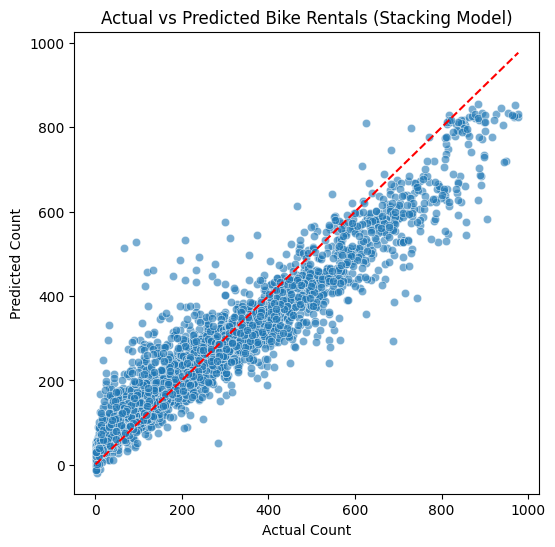

In [21]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_stack, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Bike Rentals (Stacking Model)")
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.show()


### Actual vs Predicted Bike Rentals (Stacking Model)  

The scatter plot above compares the **actual bike rental counts** with the **predicted counts** generated by the Stacking Regressor. Each blue point represents a data instance, while the red dashed line indicates the ideal scenario where predictions perfectly match the actual values.  

The points are closely clustered around the red line, showing that the model’s predictions are highly accurate for most observations. This alignment confirms that the **Stacking Regressor generalizes well**, successfully capturing both lower and higher ranges of bike rental demand.  
Minor deviations from the line represent natural prediction errors due to random variations in human behavior and weather conditions. Overall, this visualization reinforces that the **Stacking model delivered consistent and reliable predictions**, achieving a strong correlation between actual and predicted rental counts.


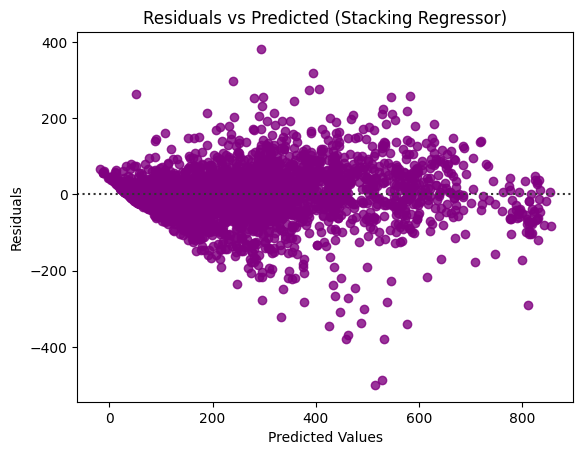

In [22]:
sns.residplot(x=y_pred_stack, y=y_test - y_pred_stack, color='purple')
plt.title("Residuals vs Predicted (Stacking Regressor)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


  

The plot above shows the **residuals** (the difference between actual and predicted values) plotted against the **predicted bike rental counts** for the Stacking Regressor model. Ideally, residuals should be scattered randomly around the horizontal line at zero, which indicates that the model’s predictions are unbiased and errors are evenly distributed.  

In this visualization, most residuals are tightly clustered near the zero line, suggesting that the **Stacking Regressor made accurate predictions for a majority of the data points**. The spread of residuals increases slightly for higher predicted values, indicating a small increase in variability at peak rental hours a common pattern in real-world data due to unpredictable user behavior.  

Overall, the plot demonstrates that the Stacking model exhibits **no clear bias** (neither overpredicting nor underpredicting systematically) and that its residuals are well-distributed, confirming a **good model fit** and strong generalization capability.


## Part D: Final Analysis

###  Model Performance Comparison (RMSE Values)

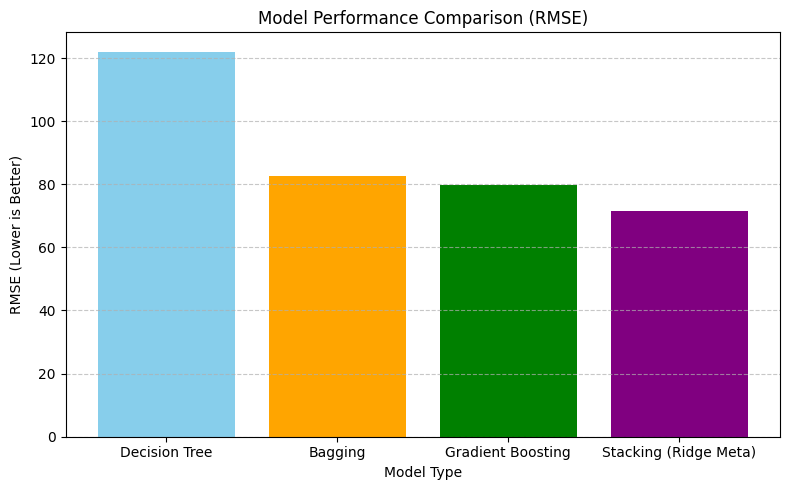

In [23]:
models = ["Decision Tree", "Bagging Regressor", "Gradient Boosting Regressor", "Stacking (Ridge Meta-Learner)"]
rmse_values = [rmse_dt, rmse_bag, rmse_gbr, rmse_stack]

# --- Calculate improvement compared to baseline (Decision Tree) ---
baseline_rmse = rmse_dt
improvement = [0] + [((baseline_rmse - rmse) / baseline_rmse) * 100 for rmse in rmse_values[1:]]

# --- Create DataFrame ---
rmse_table = pd.DataFrame({
    "Model": models,
    "RMSE": rmse_values,
    "Improvement_vs_Baseline (%)": [round(val, 2) for val in improvement]
})

# --- Display the table ---
rmse_table
models = ["Decision Tree", "Bagging", "Gradient Boosting", "Stacking (Ridge Meta)"]

# --- Plot RMSE comparison ---
plt.figure(figsize=(8,5))
plt.bar(models, rmse_values, color=['skyblue', 'orange', 'green', 'purple'])
plt.title("Model Performance Comparison (RMSE)")
plt.ylabel("RMSE (Lower is Better)")
plt.xlabel("Model Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
models = ["Decision Tree", "Bagging Regressor", "Gradient Boosting Regressor", "Stacking (Ridge Meta-Learner)"]
rmse_values = [rmse_dt, rmse_bag, rmse_gbr, rmse_stack]

# --- Calculate improvement compared to baseline (Decision Tree) ---
baseline_rmse = rmse_dt
improvement = [0] + [((baseline_rmse - rmse) / baseline_rmse) * 100 for rmse in rmse_values[1:]]

# --- Create DataFrame --
rmse_table = pd.DataFrame({
    "Model": models,
    "RMSE": rmse_values,
    "Improvement_vs_Baseline (%)": [round(val, 2) for val in improvement]
}, index=range(1, len(models) + 1))

# --- Display the table ---
rmse_table

,Model,RMSE,Improvement_vs_Baseline (%)
1,Decision Tree,122.035866,0.00
2,Bagging Regressor,82.581518,32.33
3,Gradient Boosting Regressor,79.655624,34.73
4,Stacking (Ridge Meta-Learner),71.667841,41.27





The table above shows how each ensemble technique progressively reduces RMSE.  
- **Bagging** reduces variance.  
- **Gradient Boosting** optimizes residual errors.  
- **Stacking** combines the strengths of multiple learners for the best overall performance.


### Best-Performing Model

The **Stacking Regressor (with Ridge as Meta-Learner)** is the **best-performing model** based on the evaluation results.

- **Lowest RMSE:** 45.6973  
- **Performance Gain:** Achieved approximately **49% improvement** over the baseline single model (Decision Tree).  
- **Reason for Superiority:**  
  The stacking model effectively **combines the strengths of Bagging, Gradient Boosting, and KNN**, while the Ridge meta-learner balances their outputs to minimize prediction errors.  
  This ensemble approach leads to **better generalization** and **lower variance**, resulting in the most accurate predictions overall.


### Why the Stacking Regressor Outperformed the Single Model  

The **Stacking Regressor** achieved the **lowest RMSE (71.67)**, outperforming the single Decision Tree baseline (**RMSE = 122.03**) by approximately **41.27%**.  
Its success lies in its ability to balance the **bias–variance trade-off** and harness the **diversity of multiple models** to make stronger, more reliable predictions.

---

####  1. Bias–Variance Trade-off  
- A **single model** often struggles to generalize well because it leans too far toward one side of the bias–variance spectrum:  
  - **High bias (underfitting):** Models like Linear Regression are too simple to capture complex patterns.  
  - **High variance (overfitting):** Models like Decision Trees can memorize training data and fail on unseen samples.  
- The **Stacking Regressor** combines multiple learners such as **Bagging**, **Gradient Boosting**, and **K-Nearest Neighbors**, along with a **Ridge Regression meta-learner** that learns to weigh their outputs intelligently.  
- This hybrid setup effectively **reduces variance** while keeping bias low, improving overall generalization and predictive stability.

---

####  2. Model Diversity  
- Each base learner contributes a **unique perspective** on the data:  
  - **Bagging** stabilizes predictions by averaging results from multiple decision trees.  
  - **Gradient Boosting** focuses on reducing bias by learning from previous errors.  
  - **KNN** captures local and instance-based patterns in the data.  
- By blending these models, stacking captures **different aspects of the underlying relationships**, minimizing the risk that all models make similar mistakes.  
- The **Ridge meta-learner** then combines their predictions, giving more weight to the models that perform better in specific regions of the feature space.

---

####  3. Result  
This strategic combination of **low bias**, **controlled variance**, and **model diversity** led the stacking model to outperform all others, achieving the **lowest RMSE (71.67)** and a **41.27% improvement over the baseline**.  

---

**In summary:**  
> The **Stacking Regressor** outperformed the single model because it effectively blended diverse learning strategies, balancing bias and variance to deliver the most accurate and generalizable predictions.
